1. 자전거의 평균 운행속도가 높은 경우 자전거에 부하가 많이 걸려서 고장확률이 높을 것이다.
2. 자전거의 평균 운행속도가 높게 운행된 자전거들의 고장 부위는 특정될 것이다.
(or 평균 운행속도가 높을수록 고장률이 높을 것이다.)

In [1]:
# 라이브러리 임포트
import os
import pandas as pd
import chardet

# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기

import time

import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정 (Windows 기준)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 사용
font_prop = fm.FontProperties(fname=font_path)

# matplotlib 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

---
## 고장 신고 데이터

In [4]:
file_path_faults = r'G:\내 드라이브\DataSet\_최종 병합 파일\서울시 공공자전거 고장신고 내역_15-24.06.parquet'
data_faults = pd.read_parquet(file_path_faults)

In [8]:
data_faults.shape[0]

767715

In [10]:
data_faults.head(2)

,자전거번호,고장구분,등록일자,등록시간
0,SPB-00108,체인,2015-12-04,07:41:01
1,SPB-00210,체인,2015-12-07,12:23:33


In [12]:
# 등록일자에서 년/월/일 추출하여 새로운 열 생성
data_faults['년'] = data_faults['등록일자'].astype(str).str[0:4]
data_faults['월'] = data_faults['등록일자'].astype(str).str[5:7]
data_faults['일'] = data_faults['등록일자'].astype(str).str[8:10]

In [14]:
data_faults.head(3)

,자전거번호,고장구분,등록일자,등록시간,년,월,일
0,SPB-00108,체인,2015-12-04,07:41:01,2015,12,04
1,SPB-00210,체인,2015-12-07,12:23:33,2015,12,07
2,SPB-00035,기타,2015-12-09,17:07:00,2015,12,09


In [16]:
data_faults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767715 entries, 0 to 767714
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   자전거번호   767715 non-null  string
 1   고장구분    767715 non-null  string
 2   등록일자    767715 non-null  string
 3   등록시간    618185 non-null  string
 4   년       767715 non-null  object
 5   월       767715 non-null  object
 6   일       767715 non-null  object
dtypes: object(3), string(4)
memory usage: 41.0+ MB


### 고장내역 2020 ~ 2024만 가져오기

In [19]:
data_faults = data_faults[data_faults['년'].between('2020', '2024')]

In [21]:
data_faults.shape[0]

649426

### 결측치 확인 (고장내역)

<Axes: >

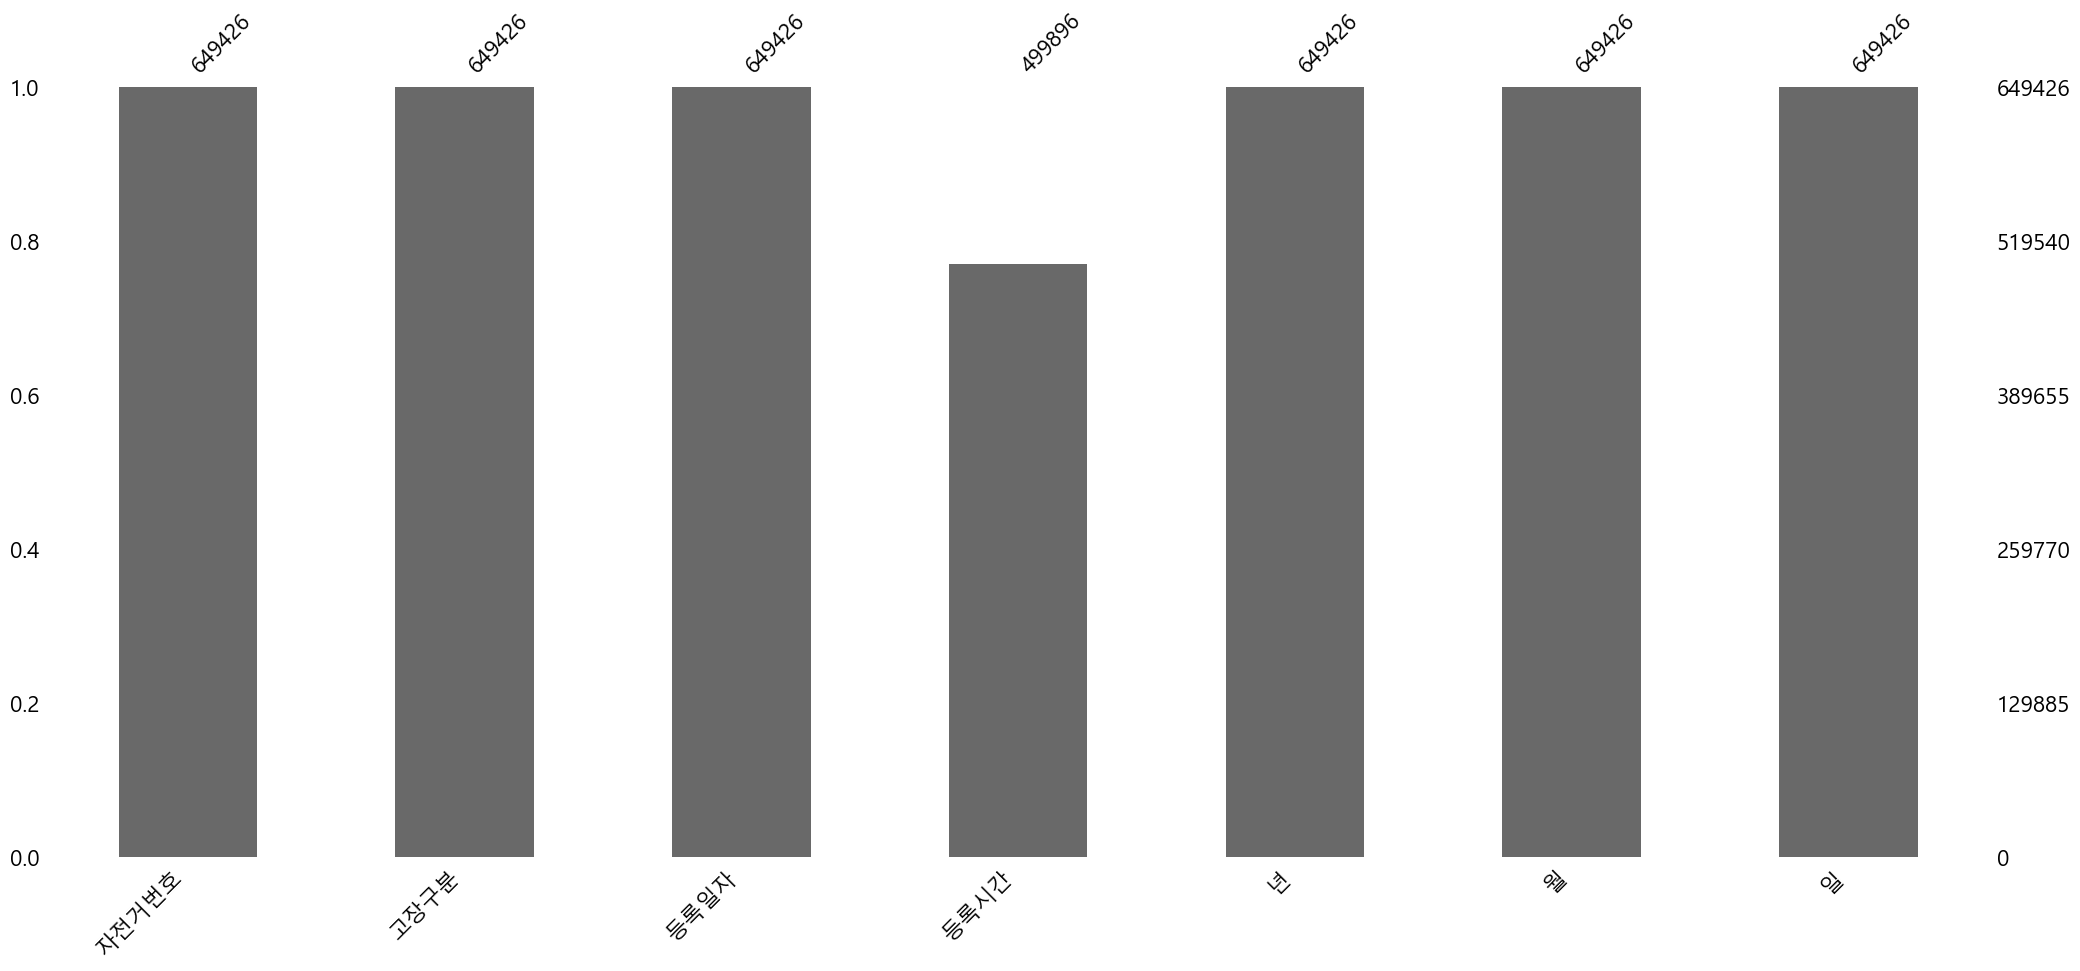

In [24]:
import missingno as msno
#msno.matrix(data_faults)
msno.bar(data_faults)
#msno.heatmap(data_faults)
#msno.dendrogram(data_faults)

In [26]:
data_faults.head(3)

,자전거번호,고장구분,등록일자,등록시간,년,월,일
118289,SPB-22497,타이어,2020-01-01,00:05:59,2020,01,01
118290,SPB-22497,체인,2020-01-01,00:05:59,2020,01,01
118291,SPB-21107,단말기,2020-01-01,00:08:22,2020,01,01


### 고장구분 별 비율

In [29]:
gb_percentage = data_faults['고장구분'].value_counts(normalize=True)
print(gb_percentage.sort_index(ascending=True))

고장구분
기타      0.285688
단말기     0.068453
안장      0.176294
체인       0.19915
타이어     0.175754
페달      0.094662
Name: proportion, dtype: Float64


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

---
### 고장구분 별 고장 비율

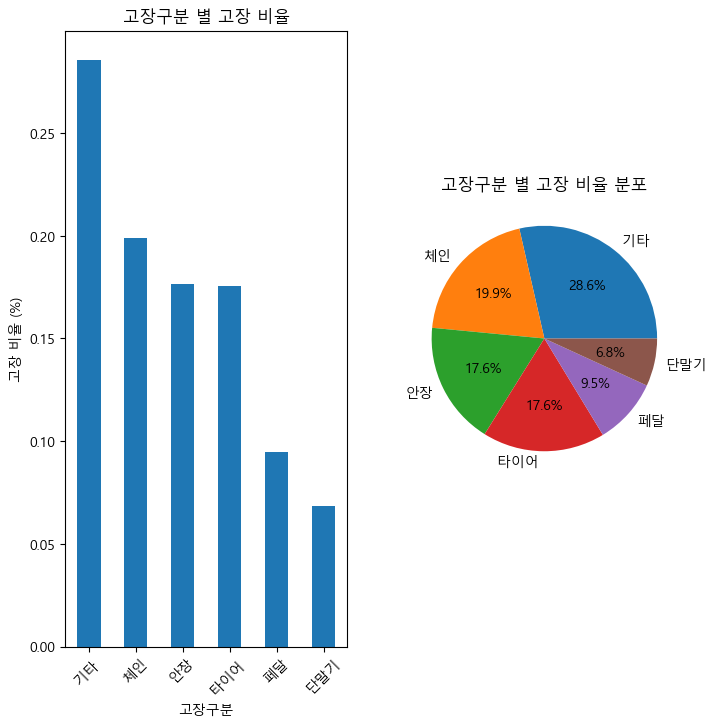

In [41]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
gb_percentage.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('고장구분 별 고장 비율')
plt.xlabel('고장구분')
plt.ylabel('고장 비율 (%)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
gb_percentage.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('고장구분 별 고장 비율 분포')
plt.ylabel('')

plt.show()


---
### 년/월/일 별 고장비율

#### 년별 고장비율

In [53]:
yearly_percentage = data_faults['년'].value_counts(normalize=True) * 100
print(yearly_percentage.sort_index(ascending=True))

년
2020    10.569795
2021    23.241755
2022    27.789463
2023    26.625050
2024    11.773936
Name: proportion, dtype: float64


#### 월별 고장비율

In [63]:
month_percentage = data_faults['월'].value_counts(normalize=True) * 100
month_percentage = month_percentage.sort_index(ascending=True)
print(month_percentage)

월
01     4.079911
02     3.707582
03     7.404847
04    11.333855
05    12.279459
06    12.049256
07     8.951289
08     8.709845
09    10.140801
10    10.219178
11     6.744417
12     4.379560
Name: proportion, dtype: float64


#### 일별 고장비율

In [57]:
day_percentage = data_faults['일'].value_counts(normalize=True) * 100
day_percentage = day_percentage.sort_index(ascending=True)
print(day_percentage)

일
01    3.375904
02    3.470911
03    3.252719
04    3.140004
05    3.138618
06    3.091037
07    3.271966
08    3.274430
09    3.145547
10    3.120910
11    3.320625
12    3.354193
13    3.334637
14    3.592711
15    3.093039
16    3.494932
17    3.556371
18    3.433186
19    3.365126
20    3.335253
21    3.261034
22    3.370361
23    3.149705
24    3.447044
25    3.330634
26    3.297065
27    3.380832
28    3.187738
29    2.792620
30    2.786461
31    1.834389
Name: proportion, dtype: float64


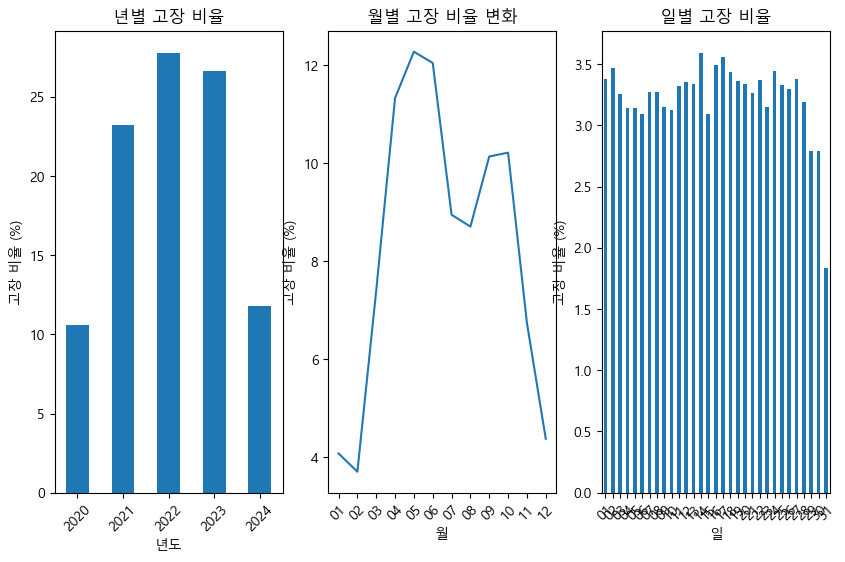

In [65]:
plt.figure(figsize=(12, 6))

# 년도별 고장비율
plt.subplot(1, 3, 1)
yearly_percentage.sort_index(ascending=True).plot(kind='bar', figsize=(10, 6))
plt.title('년별 고장 비율')
plt.xlabel('년도')
plt.ylabel('고장 비율 (%)')
plt.xticks(rotation=45)

# 월별 고장비율
plt.subplot(1, 3, 2)
sns.lineplot(x=month_percentage.index, y=month_percentage.values)
plt.title('월별 고장 비율 변화')
plt.xlabel('월')
plt.ylabel('고장 비율 (%)')
plt.xticks(rotation=45)

# 일별 고장비율
plt.subplot(1, 3, 3)
day_percentage.sort_index(ascending=True).plot(kind='bar', figsize=(10, 6))
plt.title('일별 고장 비율')
plt.xlabel('일')
plt.ylabel('고장 비율 (%)')
plt.xticks(rotation=45)

plt.show()

### 자전거 별 신고횟수 확인

In [909]:
data_faults_vc = data_faults['자전거번호'].value_counts().reset_index()
data_faults_vc = data_faults_vc.groupby('count').count().reset_index()
data_faults_vc.columns = ['신고횟수', '신고횟수_합계']
data_faults_vc

,신고횟수,신고횟수_합계
0,1,5893
1,2,4686
2,3,3698
3,4,2929
4,5,2361
...,...,...
74,80,1
75,82,1
76,86,1
77,94,1


In [911]:
data_faults_vc.describe()

,신고횟수,신고횟수_합계
count,79.0,79.000000
mean,41.050633,719.240506
std,24.737545,1150.677395
min,1.0,1.000000
25%,20.5,3.500000
50%,40.0,61.000000
75%,59.5,1257.500000
max,99.0,5893.000000


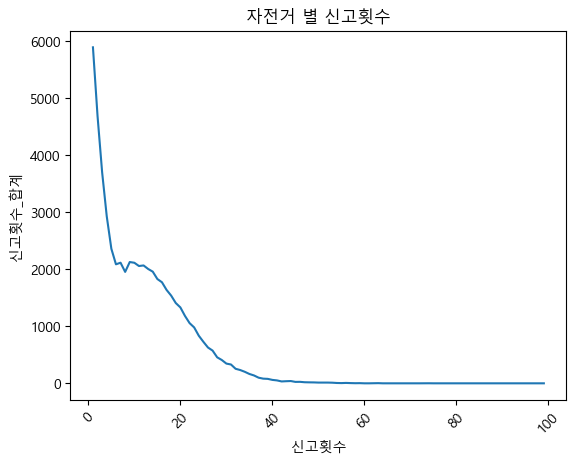

In [913]:
import seaborn as sns

sns.lineplot(x=data_faults_vc.신고횟수, y=data_faults_vc.신고횟수_합계)
plt.title('자전거 별 신고횟수')
plt.xlabel('신고횟수')
plt.ylabel('신고횟수_합계')
plt.xticks(rotation=45)
plt.show()

---
### 1번 고장난 자전거 가져오기

In [9]:
bike_faults_1 = data_faults['자전거번호'].value_counts()[data_faults['자전거번호'].value_counts() == 1].reset_index()
bike_faults_1

,자전거번호,count
0,SPB-83288,1
1,SPB-83276,1
2,SPB-69937,1
3,SPB-82169,1
4,SPB-84731,1
...,...,...
3223,SPB-84811,1
3224,SPB-69952,1
3225,SPB-59707,1
3226,SPB-24056,1


In [10]:
data_faults[data_faults['자전거번호'].isin(bike_faults_1['자전거번호'])]

,자전거번호,고장구분,등록일자,등록시간
9,SPB-00688,기타,2016-01-23,18:18:58
12,SPB-00181,단말기,2016-01-30,19:06:38
23,SPB-00657,단말기,2016-03-12,12:38:02
29,SPB-00821,기타,2016-03-19,12:42:41
30,SPB-00308,체인,2016-03-21,18:15:02
...,...,...,...,...
766681,SPB-64665,기타,2024-06-28,12:37:40
766869,SPB-81880,타이어,2024-06-28,18:37:35
767029,SPB-60122,체인,2024-06-28,22:05:54
767167,SPB-70139,기타,2024-06-29,09:25:12


In [920]:
data_faults_1 = data_faults[data_faults['자전거번호'].isin(bike_faults_1['자전거번호'])]

In [922]:
data_faults_1.shape[0]

5893

### 1번 고장난 데이터 시각화

In [925]:
data_faults[data_faults['자전거번호'].isin(bike_faults_1['자전거번호'])]['고장구분'].value_counts(normalize=True)

고장구분
기타      0.288648
단말기     0.286611
타이어     0.192601
안장      0.104191
체인      0.098422
페달      0.029527
Name: proportion, dtype: Float64

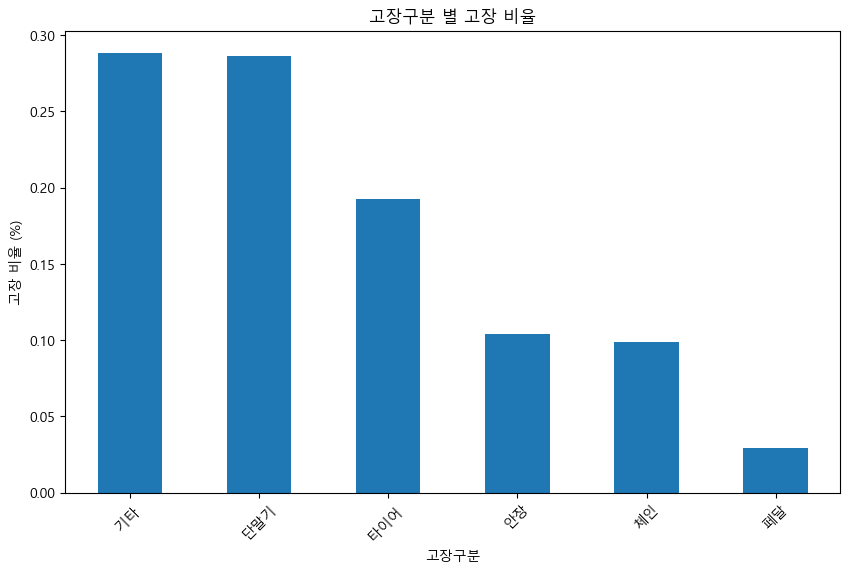

In [927]:
import matplotlib.pyplot as plt

data_faults[data_faults['자전거번호'].isin(bike_faults_1['자전거번호'])]['고장구분'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('고장구분 별 고장 비율')
plt.xlabel('고장구분')
plt.ylabel('고장 비율 (%)')
plt.xticks(rotation=45)
plt.show()

In [929]:
pd.Series(bike_faults_1['자전거번호'])

0       SPB-23714
1       SPB-00111
2       SPB-84841
3       SPB-22790
4       SPB-20057
          ...    
5888    SPB-16858
5889    SPB-02786
5890    SPB-14971
5891    SPB-09618
5892    SPB-81048
Name: 자전거번호, Length: 5893, dtype: string

---
## 대여 이력 데이터
 - 2018 ~ 2024 대여이력 합치기

In [1012]:
data_rentals = pd.DataFrame()

In [1014]:
_years = ['2018', '2019', '2020', '2021', '2022', '2023', '2024']

# 필요한 컬럼만 선택하여 읽기
columns_to_read = ['자전거번호','이용시간(분)', '이용거리(M)', '대여일자', '반납일자', '이용속도(km/h)']

for _year in _years:
    start_time = time.time()
    file_path_rentals = r'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_' + _year + '_preprocessed.parquet'
    data_rental = pd.read_parquet(file_path_rentals, columns = columns_to_read)

    # 고장회수-1회인 자전거번호 의 데이터만 가져오기
    data_rental = data_rental[data_rental['자전거번호'].isin(bike_faults_1['자전거번호'])]
    
    data_rentals = pd.concat([data_rentals, data_rental], ignore_index=True)
    print(f"read_parquet time : {_year}년, {time.time() - start_time}")

read_parquet time : 2018년, 2.6477789878845215
read_parquet time : 2019년, 4.83327579498291
read_parquet time : 2020년, 2.553230047225952
read_parquet time : 2021년, 8.18043828010559
read_parquet time : 2022년, 14.43766736984253
read_parquet time : 2023년, 16.193759202957153
read_parquet time : 2024년, 7.812716245651245


In [1016]:
data_rentals.head(2)

,자전거번호,이용시간(분),이용거리(M),대여일자,반납일자,이용속도(km/h)
0,SPB-13676,69.0,15730.0,2018-01-01,2018-01-01,13.678261
1,SPB-03730,14.0,2520.0,2018-01-01,2018-01-01,10.800000


In [1018]:
data_rentals.shape[0]

7881037

---
### 고장내역의 "등록일자" 이전의 대여이력정보 만 가져오기

In [1020]:
data_rentals = pd.merge(data_rentals, data_faults_1, on='자전거번호')
data_rentals.head(2)

,자전거번호,이용시간(분),이용거리(M),대여일자,반납일자,이용속도(km/h),고장구분,등록일자,등록시간,년,월,일
0,SPB-13676,69.0,15730.0,2018-01-01,2018-01-01,13.678261,단말기,2020-03-29,11:16:57,2020,03,29
1,SPB-03730,14.0,2520.0,2018-01-01,2018-01-01,10.800000,단말기,2020-07-08,21:55:58,2020,07,08


In [1021]:
data_rentals = data_rentals.query('대여일자 < 등록일자')

C:\Users\user\AppData\Local\Temp\ipykernel_632\2175692579.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  data_rentals = data_rentals.query('대여일자 < 등록일자')


In [1024]:
data_rentals.shape[0]

6515816

In [1026]:
data_rentals.head(3)

,자전거번호,이용시간(분),이용거리(M),대여일자,반납일자,이용속도(km/h),고장구분,등록일자,등록시간,년,월,일
0,SPB-13676,69.0,15730.0,2018-01-01,2018-01-01,13.678261,단말기,2020-03-29,11:16:57,2020,03,29
1,SPB-03730,14.0,2520.0,2018-01-01,2018-01-01,10.800000,단말기,2020-07-08,21:55:58,2020,07,08
2,SPB-09038,16.0,3630.0,2018-01-01,2018-01-01,13.612500,체인,2020-01-29,10:08:27,2020,01,29


### 이용속도 구간 나누기

In [1028]:
import pandas as pd

# 속도 구간 정의 함수
def get_speed_interval(speed):
    if speed < 5:
        return '0-5'
    elif speed < 10:
        return '5-10'
    elif speed < 15:
        return '10-15'
    elif speed < 20:
        return '15-20'
    elif speed < 25:
        return '20-25'
    elif speed < 30:
        return '25-30'
    else:
        return '30+'

# 각 이용속도에 대해 구간 추가
#data_rentals2['이용속도_구간'] = data_rentals2['이용속도(km)'].apply(get_speed_interval)
data_rentals.loc[:, '이용속도_구간'] = data_rentals['이용속도(km/h)'].apply(get_speed_interval)

In [1030]:
data_rentals.head(2)

,자전거번호,이용시간(분),이용거리(M),대여일자,반납일자,이용속도(km/h),고장구분,등록일자,등록시간,년,월,일,이용속도_구간
0,SPB-13676,69.0,15730.0,2018-01-01,2018-01-01,13.678261,단말기,2020-03-29,11:16:57,2020,03,29,10-15
1,SPB-03730,14.0,2520.0,2018-01-01,2018-01-01,10.800000,단말기,2020-07-08,21:55:58,2020,07,08,10-15


In [1032]:
data_rentals['이용속도_구간'].value_counts()

이용속도_구간
5-10     2809114
10-15    2397199
0-5       847870
15-20     439994
30+        20968
20-25        671
Name: count, dtype: int64

In [1034]:
data_rentals[data_rentals['이용시간(분)'] == 0].sort_values(by = '이용속도(km/h)', ascending = False).head(2)

,자전거번호,이용시간(분),이용거리(M),대여일자,반납일자,이용속도(km/h),고장구분,등록일자,등록시간,년,월,일,이용속도_구간
1201511,SPB-08316,0.0,0.0,2018-10-01,2018-10-01,NaN,단말기,2020-04-16,13:34:33,2020,04,16,30+
1202082,SPB-13112,0.0,0.0,2018-10-01,2018-10-01,NaN,기타,2020-04-09,21:53:52,2020,04,09,30+


In [1036]:
data_rentals = data_rentals[data_rentals['이용시간(분)'] != 0]

In [1038]:
data_rentals.shape[0]

6494848

In [1040]:
data_rentals.head(2)

,자전거번호,이용시간(분),이용거리(M),대여일자,반납일자,이용속도(km/h),고장구분,등록일자,등록시간,년,월,일,이용속도_구간
0,SPB-13676,69.0,15730.0,2018-01-01,2018-01-01,13.678261,단말기,2020-03-29,11:16:57,2020,03,29,10-15
1,SPB-03730,14.0,2520.0,2018-01-01,2018-01-01,10.800000,단말기,2020-07-08,21:55:58,2020,07,08,10-15


In [1042]:
data_rentals.describe()

,이용시간(분),이용거리(M),이용속도(km/h)
count,6.494848e+06,6.494848e+06,6.494848e+06
mean,2.630173e+01,3.526191e+03,9.331722e+00
std,2.950209e+01,3.919623e+03,3.789811e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+00,1.150000e+03,6.972414e+00
50%,1.500000e+01,2.120000e+03,9.428571e+00
75%,3.500000e+01,4.310000e+03,1.185000e+01
max,4.215000e+03,2.148500e+05,2.034000e+01


---
### '이용속도(km)' / 이용거리(M) 이상치 확인 및 삭제

In [1044]:
# IQR 계산
df = data_rentals['이용속도(km/h)']
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print('Q1 : ', Q1)
print('Q3 : ', Q3)
print('IQR : ', IQR)

# 이상치 조건 설정
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# 이상치 데이터 수
outlier_count = df[outliers].shape[0]
outlier_count_ = df[~outliers].shape[0]

print(f'outlier_count :  {outlier_count}, outlier_count_ : {outlier_count_}')

# 전체 데이터 수
total_count = df.shape[0]

# 비율 계산
outlier_percentage = (outlier_count / total_count) * 100

print(f"이상치 비율: {outlier_percentage:.2f}%")


Q1 :  6.972413793103448
Q3 :  11.850000000000001
IQR :  4.877586206896553
outlier_count :  13766, outlier_count_ : 6481082
이상치 비율: 0.21%


In [1046]:
# IQR 계산
df = data_rentals['이용거리(M)']
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print('Q1 : ', Q1)
print('Q3 : ', Q3)
print('IQR : ', IQR)

# 이상치 조건 설정
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# 이상치 데이터 수
outlier_count = df[outliers].shape[0]
outlier_count_ = df[~outliers].shape[0]

print(f'outlier_count :  {outlier_count}, outlier_count_ : {outlier_count_}')

# 전체 데이터 수
total_count = df.shape[0]

# 비율 계산
outlier_percentage = (outlier_count / total_count) * 100

print(f"이상치 비율: {outlier_percentage:.2f}%")

Q1 :  1150.0
Q3 :  4310.0
IQR :  3160.0
outlier_count :  547681, outlier_count_ : 5947167
이상치 비율: 8.43%


In [1048]:
data_rentals[outliers].sort_values(by = '이용거리(M)', ascending = False).head(20)

,자전거번호,이용시간(분),이용거리(M),대여일자,반납일자,이용속도(km/h),고장구분,등록일자,등록시간,년,월,일,이용속도_구간
3700892,SPB-14170,1008.0,214850.0,2019-08-30,2019-08-31,12.788690,단말기,2020-01-29,22:08:54,2020,01,29,10-15
4761804,SPB-13668,518.0,129460.0,2019-11-05,2019-11-05,14.995367,단말기,2020-04-01,20:21:35,2020,04,01,10-15
962695,SPB-16182,458.0,111010.0,2018-09-02,2018-09-02,14.542795,단말기,2020-03-07,11:30:29,2020,03,07,10-15
6261875,SPB-17507,650.0,106150.0,2020-05-05,2020-05-05,9.798462,단말기,2020-08-25,17:04:07,2020,08,25,5-10
3206534,SPB-17781,347.0,100630.0,2019-07-15,2019-07-15,17.400000,단말기,2020-03-31,12:16:10,2020,03,31,15-20
6961706,SPB-62337,421.0,95640.0,2023-03-18,2023-03-18,13.630404,기타,2023-10-31,18:23:58,2023,10,31,10-15
3216248,SPB-16944,541.0,83640.0,2019-07-06,2019-07-07,9.276155,안장,2020-04-06,17:35:15,2020,04,06,5-10
3989099,SPB-06073,279.0,80760.0,2019-09-30,2019-10-01,17.367742,타이어,2020-04-09,12:44:27,2020,04,09,15-20
4248498,SPB-14235,277.0,80640.0,2019-10-04,2019-10-04,17.467148,안장,2020-03-02,22:00:37,2020,03,02,15-20
293921,SPB-06928,417.0,80520.0,2018-05-13,2018-05-13,11.585612,타이어,2020-02-19,09:38:40,2020,02,19,10-15


<Axes: xlabel='이용거리(M)', ylabel='Count'>

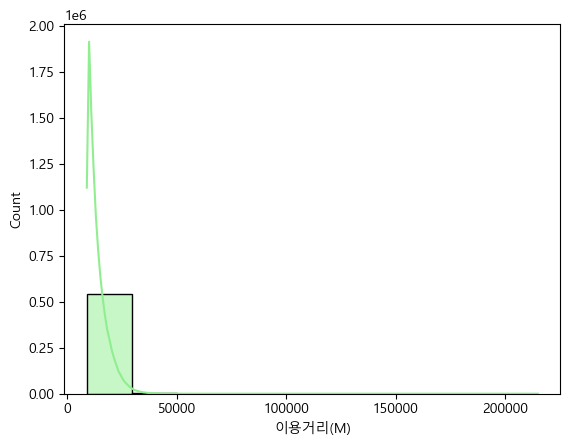

In [1050]:
sns.histplot(data_rentals[outliers]['이용거리(M)'], bins=10, kde=True, color='lightgreen')

In [1052]:
# 이상치 데이터 수
outlier_count = data_rentals[data_rentals['이용거리(M)'] > 40000].shape[0]
outlier_count_ = data_rentals[data_rentals['이용거리(M)'] <= 40000].shape[0]

print(f'outlier_count :  {outlier_count}, outlier_count_ : {outlier_count_}')

# 전체 데이터 수
total_count = df.shape[0]

# 비율 계산
outlier_percentage = (outlier_count / total_count) * 100

outlier_count :  674, outlier_count_ : 6494174


### "이용거리(M)" 이상치 제거

In [1054]:
data_rentals = data_rentals[data_rentals['이용거리(M)'] <= 40000]

C:\Users\user\AppData\Local\Temp\ipykernel_632\2913295735.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data_rentals[~outliers]['이용거리(M)'], bins=10, kde=True, color='lightgreen')


<Axes: xlabel='이용거리(M)', ylabel='Count'>

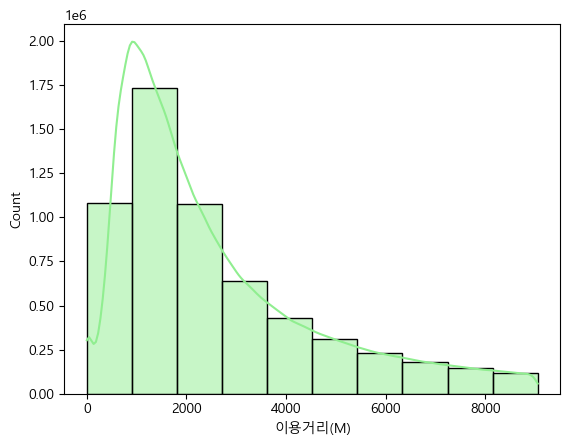

In [1056]:
sns.histplot(data_rentals[~outliers]['이용거리(M)'], bins=10, kde=True, color='lightgreen')

In [1058]:
data_rentals[outliers]['이용속도_구간'].value_counts()
#sns.histplot(data_rentals2['이용속도(km)'], bins=10, kde=True, color='lightgreen')

C:\Users\user\AppData\Local\Temp\ipykernel_632\344771741.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_rentals[outliers]['이용속도_구간'].value_counts()


이용속도_구간
10-15    275717
5-10     181539
15-20     79856
0-5        9782
20-25       113
Name: count, dtype: int64

In [1060]:
data_rentals[~outliers]['이용속도_구간'].value_counts()
#sns.histplot(data_rentals2['이용속도(km)'], bins=10, kde=True, color='lightgreen')

C:\Users\user\AppData\Local\Temp\ipykernel_632\4180017381.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_rentals[~outliers]['이용속도_구간'].value_counts()


이용속도_구간
5-10     2627466
10-15    2121172
0-5       838086
15-20     359890
20-25        553
Name: count, dtype: int64

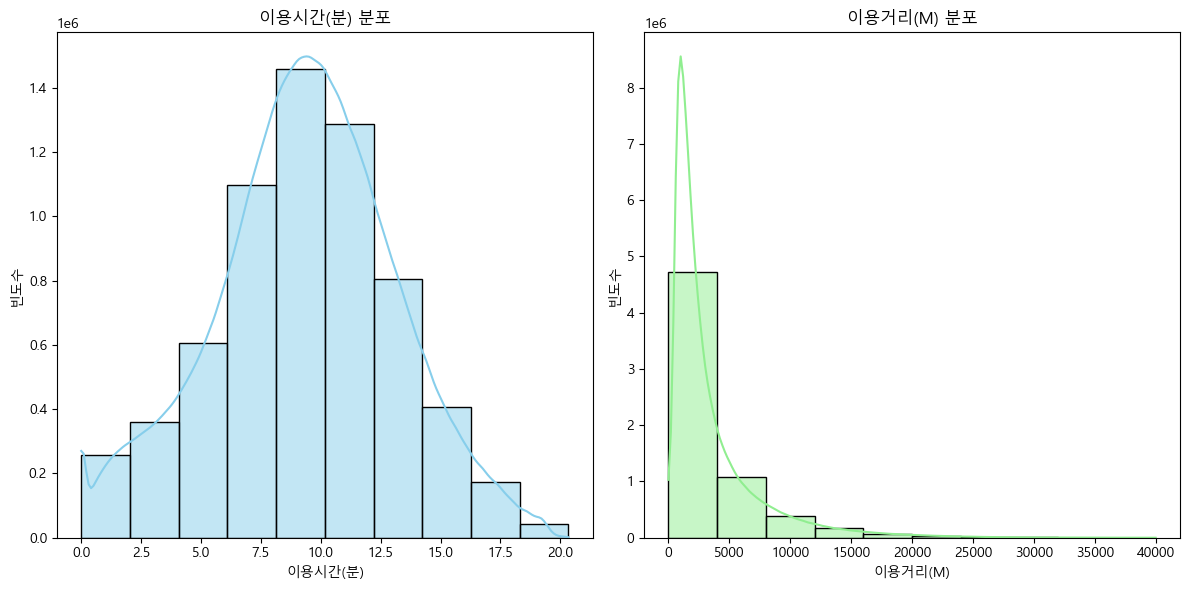

In [1082]:
# 히스토그램과 KDE 시각화
plt.figure(figsize=(12, 6))

# 이용시간(분) 히스토그램 및 KDE
plt.subplot(1, 2, 1)
sns.histplot(data_rentals['이용속도(km/h)'], bins=10, kde=True, color='skyblue')
plt.title('이용시간(분) 분포')
plt.xlabel('이용시간(분)')
plt.ylabel('빈도수')

# 이용거리(M) 히스토그램 및 KDE
plt.subplot(1, 2, 2)
sns.histplot(data_rentals['이용거리(M)'], bins=10, kde=True, color='lightgreen')
plt.title('이용거리(M) 분포')
plt.xlabel('이용거리(M)')
plt.ylabel('빈도수')

plt.tight_layout()
plt.show()

In [1064]:
data_rentals2_pivot = data_rentals.pivot_table(index='자전거번호', columns='이용속도_구간', values='이용거리(M)', aggfunc='sum', fill_value=0)
data_rentals2_pivot.head(10)

이용속도_구간,0-5,10-15,15-20,20-25,5-10
자전거번호,,,,,
SPB-00007,22850.0,139160.0,5710.0,0.0,110240.0
SPB-00011,154510.0,1005790.0,204530.0,0.0,872640.0
SPB-00012,15530.0,145030.0,16240.0,0.0,165910.0
SPB-00013,122190.0,813610.0,213460.0,0.0,821540.0
SPB-00014,151060.0,981340.0,213360.0,0.0,820220.0
SPB-00015,371180.0,2411840.0,347500.0,0.0,2260660.0
SPB-00017,1920.0,63140.0,22530.0,0.0,34750.0
SPB-00018,219940.0,1306820.0,227970.0,0.0,1235900.0
SPB-00020,250690.0,1294460.0,224640.0,0.0,1228100.0


In [1066]:
data_rentals2_pivot.shape[0]

5759

In [1068]:
data_faults_1.head(2)

,자전거번호,고장구분,등록일자,등록시간,년,월,일
118297,SPB-18542,기타,2020-01-01,04:35:30,2020,01,01
118301,SPB-13927,페달,2020-01-01,11:47:52,2020,01,01


In [1070]:
data_faults_2 = data_faults_1[['자전거번호', '고장구분', '등록일자', '등록시간']]
data_faults_2.head(2)

,자전거번호,고장구분,등록일자,등록시간
118297,SPB-18542,기타,2020-01-01,04:35:30
118301,SPB-13927,페달,2020-01-01,11:47:52


In [1072]:
df_final = pd.merge(data_rentals2_pivot, data_faults_2, on='자전거번호', how='left')
df_final.head(3)

,자전거번호,0-5,10-15,15-20,20-25,5-10,고장구분,등록일자,등록시간
0,SPB-00007,22850.0,139160.0,5710.0,0.0,110240.0,체인,2020-02-29,02:26:33
1,SPB-00011,154510.0,1005790.0,204530.0,0.0,872640.0,타이어,2020-03-30,18:36:00
2,SPB-00012,15530.0,145030.0,16240.0,0.0,165910.0,단말기,2020-03-23,18:22:55


In [1074]:
df_encoded = pd.get_dummies(df_final, columns=['고장구분'])
df_encoded.head(2)

,자전거번호,0-5,10-15,15-20,20-25,5-10,등록일자,등록시간,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
0,SPB-00007,22850.0,139160.0,5710.0,0.0,110240.0,2020-02-29,02:26:33,False,False,False,True,False,False
1,SPB-00011,154510.0,1005790.0,204530.0,0.0,872640.0,2020-03-30,18:36:00,False,False,False,False,True,False


In [1076]:
df_encoded.columns

Index(['자전거번호', '0-5', '10-15', '15-20', '20-25', '5-10', '등록일자', '등록시간',
       '고장구분_기타 ', '고장구분_단말기', '고장구분_안장', '고장구분_체인', '고장구분_타이어 ', '고장구분_페달'],
      dtype='object')

In [1078]:
df_encoded_2 = df_encoded[['0-5', '10-15', '15-20', '20-25', '5-10', '고장구분_기타 ', '고장구분_단말기',
       '고장구분_안장', '고장구분_체인', '고장구분_타이어 ', '고장구분_페달']]
df_encoded_2.head(2)

,0-5,10-15,15-20,20-25,5-10,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
0,22850.0,139160.0,5710.0,0.0,110240.0,False,False,False,True,False,False
1,154510.0,1005790.0,204530.0,0.0,872640.0,False,False,False,False,True,False


In [1098]:
# 숫자 데이터만 추출 (속도 범위)
df_numeric = df_encoded_2.iloc[:, :5]
# 전체 값을 구함
total_speed = df_numeric.sum().sum()
# 속도 범위에 따른 고장 비율 계산
df_ratio = df_numeric.sum() / total_speed
df_ratio.sort_index()

0-5      0.084084
10-15    0.418710
15-20    0.091262
20-25    0.000134
5-10     0.405810
dtype: float64

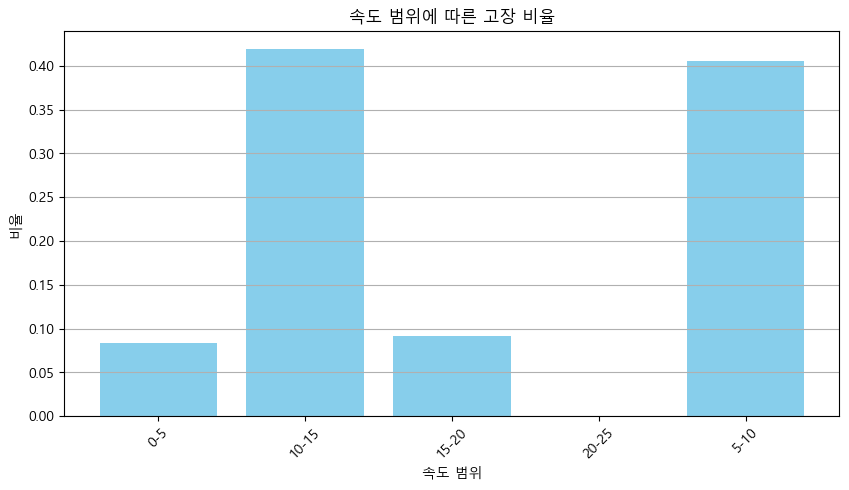

In [1092]:
import matplotlib.pyplot as plt

# 데이터를 시각화하기 위한 준비
labels = df_encoded_2.columns[0:5]
values = df_ratio.values

# 바 차트 생성
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue')
plt.title('속도 범위에 따른 고장 비율')
plt.xlabel('속도 범위')
plt.ylabel('비율')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 카이제곱 검정 (연관성 확인)
-  P-value가 유의수준(일반적으로 0.05)보다 작으면 속도와 고장 구분 간에 연관성이 있다고 판단할 수 있습니다.

In [1086]:
from scipy.stats import chi2_contingency

# 고장 여부 데이터만 추출 (True/False 값)
df_faults = df_encoded_2.iloc[:, 5:]

# 카이제곱 검정 수행
chi2_stat, p_val, dof, ex = chi2_contingency(df_faults.T)

print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-squared Statistic: 28795.0
P-value: 0.4905802645521883


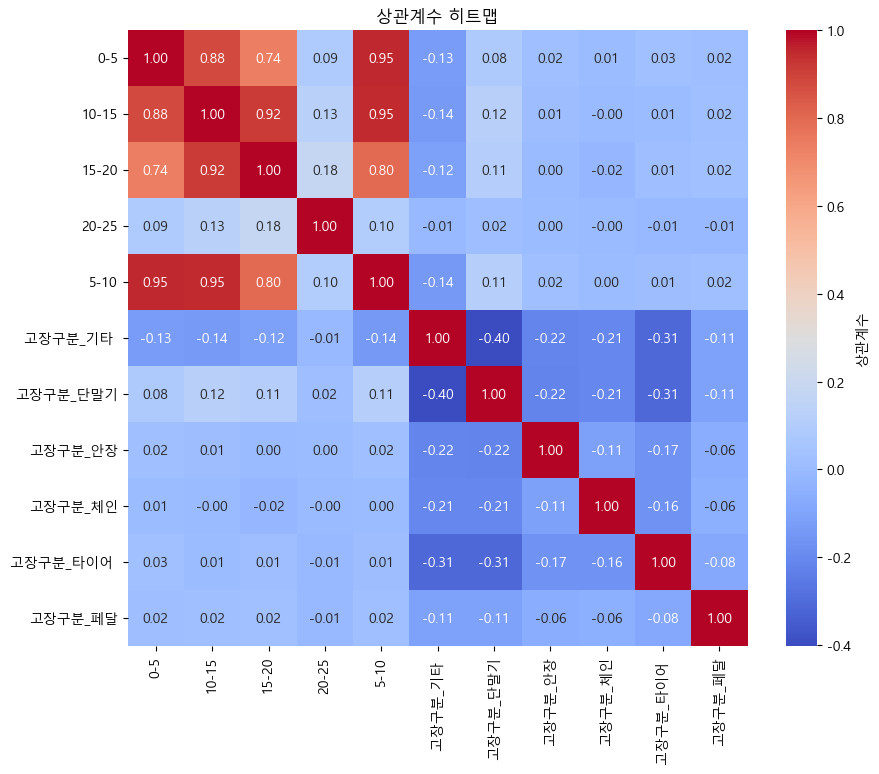

In [1080]:
# 상관계수 행렬 계산
correlation_matrix = df_encoded_2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': '상관계수'}, annot_kws={"size": 10})
plt.title('상관계수 히트맵')
plt.show()